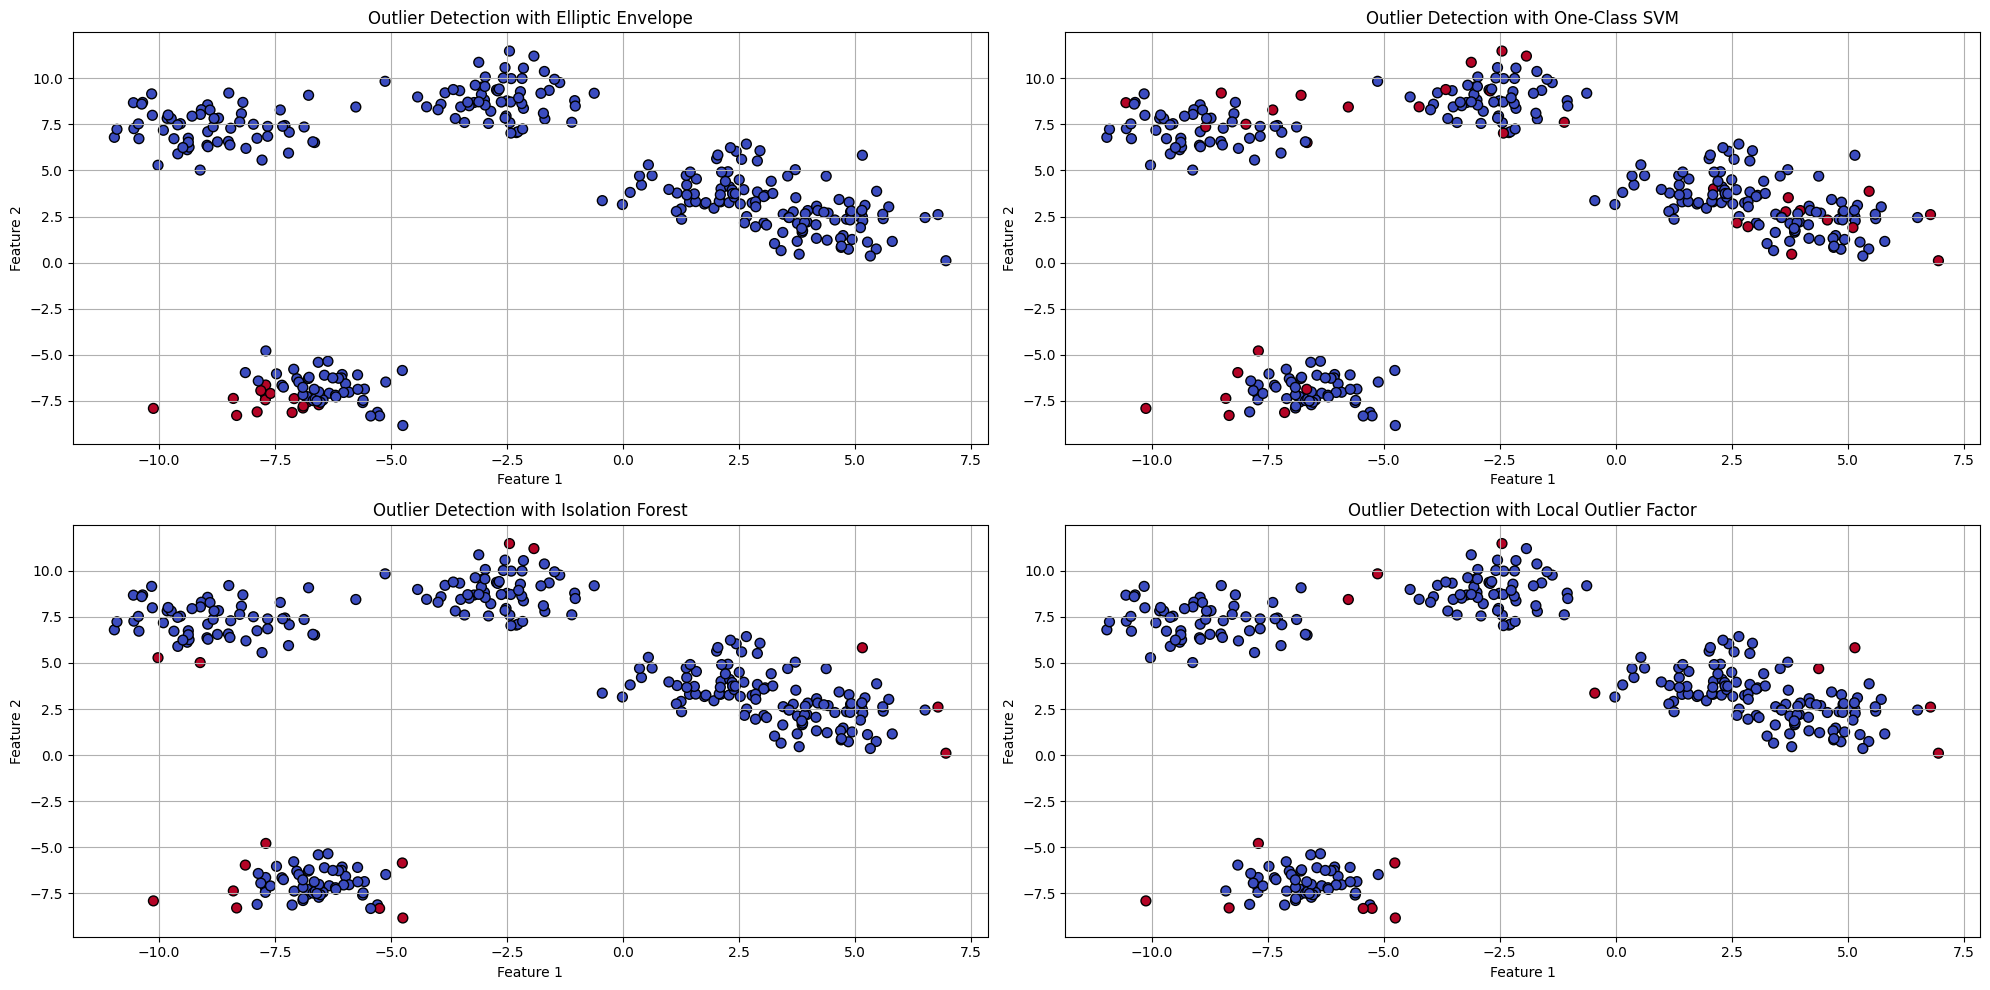

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=5, n_features=2, random_state=42)

# Define the outlier detection methods
outlier_detectors = {
    "Elliptic Envelope": EllipticEnvelope(contamination=0.05),
    "One-Class SVM": OneClassSVM(nu=0.05, kernel="rbf", gamma='auto'),
    "Isolation Forest": IsolationForest(contamination=0.05, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=False)
}

# Apply each method and visualize the results
plt.figure(figsize=(20, 10))
for i, (name, clf) in enumerate(outlier_detectors.items(), 1):
    # Fit the data and tag outliers
    if name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        # Convert labels to 0 (inliers) and 1 (outliers) for consistent coloring
        y_pred = (y_pred == -1).astype(int)
    else:
        clf.fit(X)
        y_pred = clf.predict(X)
        # Convert labels to 0 (inliers) and 1 (outliers) for consistent coloring
        y_pred = (y_pred == -1).astype(int)

    # Visualize the results
    plt.subplot(2, 2, i)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=50)
    plt.title(f'Outlier Detection with {name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

plt.tight_layout()
plt.show()


The Elliptic Envelope to show less red points, marking only the most obvious outliers.
The One-Class SVM has a lot of red dots, marking many points as outliers, which could include false positives.
The Isolation Forest provides a middle result, identifying outliers without being too aggressive.
The LOF seems to perform similarly to the Isolation Forest but focuses on local neighborhoods rather than global structure.
